# <b><span style='color:#F1A424'>AutoML - Regression </span> </b>

## <b> Problem overview:</b>
    

**Dataset Used : Advertising Sales Dataset**

**Features**:

- `TV`: Advertising done on TV.
- `Radio`: Advertising done on Radio.
- `Newspapaer`: Advertising done on Newspaper.

**Target Variable**:

- `Sales`: The Sales received after advertisement.
    
**Objective**:

The primary objective is typically to build a model that can accurately predict sales received based on advertisement.

**Usecase**:

Here, we will use AutoML(Automated Machine Learning) functionality to automate the entire process of developing a predictive model. It will perform feature exploration, feature engineering, data preparation, model training and evaluation on dataset in auto run and at end we will get leaderboard containined different models along with their performance. Model will also have rank associated with them which indicates which is best performing model for given data followed by other models.

In [1]:
# Importing AutoML from teradataml
from teradataml import AutoML, AutoRegressor

In [2]:
# Importing other important libraries
import getpass
from teradataml import create_context, remove_context
from teradataml import DataFrame
from teradataml import load_example_data
from teradataml import TrainTestSplit

In [3]:
# Create the connection.
host = getpass.getpass("Host: ")
username = getpass.getpass("Username: ")
password = getpass.getpass("Password: ")

con = create_context(host=host, username=username, password=password)

Host:  ········
Username:  ········
Password:  ········


## <b><span style='color:#F1A424'>| 1.</span> Loading Dataset </b>

In [4]:
# Loading dataset from example data collection
load_example_data('teradataml','advertising')

In [5]:
# Fetching in teradata dataframe
advertising_df = DataFrame("advertising")

In [6]:
# first 5 rows
advertising_df.head()

TV,Radio,Newspaper,Sales
5.4,29.9,9.4,5.3
7.8,38.9,50.6,6.6
8.4,27.2,2.1,5.7
8.6,2.1,1.0,4.8
11.7,36.9,45.2,7.3
13.1,0.4,25.6,5.3
8.7,48.9,75.0,7.2
7.3,28.1,41.4,5.5
4.1,11.6,5.7,3.2
0.7,39.6,8.7,1.6


In [7]:
# advertising_df dataset
advertising_df.shape

(200, 4)

In [8]:
# Performing sampling to get 80% for trainning and 20% for testing
advertising_df_sample = advertising_df.sample(frac = [0.8, 0.2])

In [9]:
advertising_df_sample.head()

TV,Radio,Newspaper,Sales,sampleid
5.4,29.9,9.4,5.3,1
7.8,38.9,50.6,6.6,1
8.4,27.2,2.1,5.7,2
8.6,2.1,1.0,4.8,2
11.7,36.9,45.2,7.3,1
13.1,0.4,25.6,5.3,2
8.7,48.9,75.0,7.2,1
7.3,28.1,41.4,5.5,2
4.1,11.6,5.7,3.2,1
0.7,39.6,8.7,1.6,1


In [10]:
# Fetching train and test data
advertising_df_train= advertising_df_sample[advertising_df_sample['sampleid'] == 1].drop('sampleid', axis=1)
advertising_df_test = advertising_df_sample[advertising_df_sample['sampleid'] == 2].drop('sampleid', axis=1)

In [11]:
# train data shape
advertising_df_train.shape

(160, 4)

In [12]:
# test data shape
advertising_df_test.shape

(40, 4)

In [13]:
#train dataset
advertising_df_train.head()

TV,Radio,Newspaper,Sales
5.4,29.9,9.4,5.3
8.7,48.9,75.0,7.2
11.7,36.9,45.2,7.3
13.2,15.9,49.6,5.6
17.2,4.1,31.6,5.9
17.9,37.6,21.6,8.0
17.2,45.9,69.3,12.0
7.8,38.9,50.6,6.6
4.1,11.6,5.7,3.2
0.7,39.6,8.7,1.6


In [14]:
# test dataset
advertising_df_test.head()

TV,Radio,Newspaper,Sales
8.6,2.1,1.0,4.8
16.9,43.7,89.4,8.7
19.4,16.0,22.3,6.6
23.8,35.1,65.9,9.2
31.5,24.6,2.2,11.0
36.9,38.6,65.6,10.8
25.0,11.0,29.7,7.2
13.1,0.4,25.6,5.3
8.4,27.2,2.1,5.7
7.3,28.1,41.4,5.5


## <b><span style='color:#F1A424'>| 2.</span> Fitting AutoML </b>

In [15]:
# Creating AutoRegressor instance
# Using all models from model training.
# Keeping early stopping timer threshold to 500 sec
# and verbose level 2 for detailed loggging

aml = AutoRegressor(max_runtime_secs=500, 
                    verbose=2)

Feature Exploration started ...

Data Overview:
Total Rows in the data: 160
Total Columns in the data: 4

Column Summary:


ColumnName,Datatype,NonNullCount,NullCount,BlankCount,ZeroCount,PositiveCount,NegativeCount,NullPercentage,NonNullPercentage
Radio,FLOAT,160,0,None,1,159,0,0.0,100.0
Newspaper,FLOAT,160,0,None,0,160,0,0.0,100.0
Sales,FLOAT,160,0,None,0,160,0,0.0,100.0
TV,FLOAT,160,0,None,0,160,0,0.0,100.0



Statistics of Data:


func,TV,Radio,Newspaper,Sales
min,0.7,0,0.3,1.6
std,84.174,14.951,21.175,5.259
25%,75.45,10.75,12.75,11.3
50%,165.05,23.45,24.95,16.5
75%,219.925,37.075,43.55,19.625
max,296.4,49.6,114,27
mean,153.069,23.747,29.967,15.531
count,160,160,160,160



Target Column Distribution:


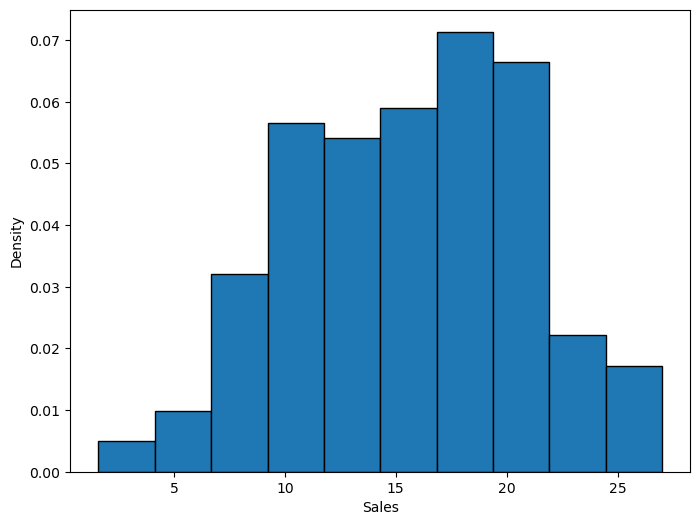

Columns with outlier percentage :-                                                                                                                                                                                                                                                                                                                                                                                                                                                                                  
  ColumnName  OutlierPercentage
0  Newspaper               1.25


Analysis complete. No action taken.                                                     


Dataset does not contain any feature related to dates.                                   


No Missing Values Detected.                                                              


No imputation is Required.                                                               


Encoding not required.                                                                   


Training size : 0.8                                                                      
Testing size  : 0.2                                                                      


TV,Radio,Newspaper,Sales,id
220.3,49.0,3.2,24.7,9
137.9,46.4,59.0,15.0,10
210.7,29.5,9.3,18.4,18
149.7,35.6,6.0,17.3,12
218.5,5.4,27.4,17.2,15
228.0,37.7,32.0,21.5,23
255.4,26.9,5.5,19.8,14
38.2,3.7,13.8,7.6,22
239.9,41.5,18.5,23.2,13
280.2,10.1,21.4,19.8,21


TV,Radio,Newspaper,Sales,id
39.5,41.1,5.8,10.8,26
93.9,43.5,50.5,15.3,24
165.6,10.0,17.6,17.6,30
171.3,39.7,37.7,16.0,126
209.6,20.6,10.7,20.9,124
265.6,20.0,0.3,17.4,27
44.5,39.3,45.1,10.4,115
163.3,31.6,52.9,16.9,31
17.2,45.9,69.3,12.0,127
68.4,44.5,35.6,13.6,29


Columns with outlier percentage :-                                                                                                                                                                                                                                                                                                                                                                                                                                                                                  
  ColumnName  OutlierPercentage
0  Newspaper               1.25


['Newspaper']
result data stored in table '"AUTOML_USR"."ml__td_sqlmr_persist_out__1712117176256535"'19


result data stored in table '"AUTOML_USR"."ml__td_sqlmr_persist_out__1712118150379222"'19
result data stored in table '"AUTOML_USR"."ml__td_sqlmr_persist_out__1712115029009697"'


['TV', 'Radio', 'Newspaper']


['TV', 'Radio', 'Newspaper']


id,Sales,TV,Radio,Newspaper
40,10.4,-0.6485049986951452,-1.1345834170126068,0.3270685438509377
80,27.0,1.421953952270581,1.7606228346788377,0.7158481337114863
99,20.6,0.35127552783038285,-0.10249600321519345,-0.9811222382473948
141,17.5,0.07128891403176733,-0.1158997358619133,1.0100597152275772
76,21.2,0.28878924492253716,1.579672443948123,1.603736656501118
17,5.3,-1.8405510110909666,0.48726823324047097,-0.9863760164887534
162,10.9,-1.448810083630243,1.1842623308698927,-0.8550315604547843
19,12.2,-0.2327308855006349,-0.5582229132036616,-0.13526394138863349
101,7.3,-1.5617660565790408,-1.4160618025937193,0.25351564847191504
221,15.6,0.49547464223310317,-1.3423412730367612,-0.36643018400841926


id,Sales,TV,Radio,Newspaper
175,10.7,-0.6989746887360972,-0.8732106304015734,-1.2910951544875617
205,15.9,-0.39495488920369515,0.9563988758756587,2.6807611959796644
194,19.4,0.7105716545504941,0.7285354208814248,1.6194979912251941
28,16.1,0.19866479842083692,-0.008669874688155993,0.17470897485153358
26,10.8,-1.430785194329903,1.2378772614567717,-1.175512033177669
89,16.0,-0.33006528772247107,1.3518089889538885,0.0381107405762056
97,13.2,-0.737427785910156,-1.4160618025937193,0.09590230123115209
122,18.4,0.8836105918337587,-0.9402292936351717,-1.023152464178265
156,13.4,-0.23152922621394528,-0.544819180556942,-0.9443457905578835
183,24.4,1.4760286201716013,1.1373492666063743,1.4513770875017133


['TV', 'Radio']


['r_TV', 'r_Radio']


id,Sales,r_TV,r_Radio
40,10.4,-0.6485049986951452,-1.1345834170126068
80,27.0,1.421953952270581,1.7606228346788377
99,20.6,0.35127552783038285,-0.10249600321519345
141,17.5,0.07128891403176733,-0.1158997358619133
76,21.2,0.28878924492253716,1.579672443948123
17,5.3,-1.8405510110909666,0.48726823324047097
162,10.9,-1.448810083630243,1.1842623308698927
19,12.2,-0.2327308855006349,-0.5582229132036616
101,7.3,-1.5617660565790408,-1.4160618025937193
221,15.6,0.49547464223310317,-1.3423412730367612


id,Sales,r_TV,r_Radio
175,10.7,-0.6989746887360972,-0.8732106304015734
205,15.9,-0.39495488920369515,0.9563988758756587
194,19.4,0.7105716545504941,0.7285354208814248
28,16.1,0.19866479842083692,-0.008669874688155993
26,10.8,-1.430785194329903,1.2378772614567717
89,16.0,-0.33006528772247107,1.3518089889538885
97,13.2,-0.737427785910156,-1.4160618025937193
122,18.4,0.8836105918337587,-0.9402292936351717
156,13.4,-0.23152922621394528,-0.544819180556942
183,24.4,1.4760286201716013,1.1373492666063743


['TV', 'Radio', 'Newspaper']


id,Sales,TV,Radio,Newspaper
8,10.1,-1.3875254600090865,0.2728085108929569,0.36384499154044925
12,17.3,-0.10655666039825423,0.8692746136719814,-1.1650044766949517
20,17.1,0.22149632486793466,0.7218335545580651,0.5529810082293649
14,19.8,1.1635972056323742,0.28621224353967645,-1.1912733679017455
13,23.2,0.9773400161955271,1.264684726750211,-0.508282196525106
21,19.8,1.4616087087313294,-0.8397012987847741,-0.35592262752570186
11,7.0,-1.679528666674595,-0.062284805275034404,1.1676730624683402
19,12.2,-0.23273088550063453,-0.5582229132036614,-0.1352639413886335
15,17.2,0.7201849288440092,-1.1546890159826857,-0.04069593304417588
23,21.5,0.8343425610794961,1.010013806462538,0.20097786605832743


id,Sales,TV,Radio,Newspaper
127,12.0,-1.6987552152616245,1.5595668449780433,2.160637150085147
89,16.0,-0.3300652877224707,1.3518089889538887,0.03811074057620561
26,10.8,-1.4307851943299026,1.237877261456772,-1.1755120331776692
122,18.4,0.8836105918337588,-0.9402292936351715,-1.0231524641782652
126,16.0,0.15300174552664264,1.1440511329297345,0.5004432258157773
29,13.6,-1.0835056604766844,1.465740716451006,0.39011388274724307
125,10.9,-1.0234226961422175,-0.3772725224729461,-0.8024937780411969
27,17.4,1.2861664528746868,-0.17621653277215138,-1.4644698364524014
115,10.4,-1.3707022299954357,1.1172436676362947,0.8892228156763259
28,16.1,0.19866479842083723,-0.008669874688155756,0.1747089748515336


['col_0', 'col_1', 'col_2']


response_column : Sales                                                                                                                               
name : decision_forest
tree_type : Regression
min_impurity : (0.0, 0.1)
max_depth : (5, 6, 7, 8)
min_node_size : (1, 2)
num_trees : (-1, 10, 20)
Total number of models for decision_forest : 48
--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

response_column : Sales
name : xgboost
model_type : Regression
column_sampling : (1, 0.6)
min_impurity : (0.0, 0.1)
lambda1 : (0.01, 0.1, 1, 10)
shrinkage_factor : (0.5, 0.1, 0.2)
max_depth : (5, 6, 7, 8)
min_node_size : (1, 2)
iter_num : (10, 20)
Total number of models for xgboost : 768
---------------------------------------------------------------------------------------------------------------------------------------------------------------------

DECISIONFOREST_6                                                                                                                                                                                        
DECISIONFOREST_7                                                                          
DECISIONFOREST_8                                                                          


XGBOOST_6                                                                                                                                                                                               
XGBOOST_7                                                                                 
XGBOOST_5                                                                                 


KNN_18                                                                                                                                                                                                  
KNN_13                                                                                    
KNN_8                                                                                     


SVM_3                                                                                                                                                                                                   
SVM_4                                                                                     
SVM_2                                                                                     


GLM_0                                                                                                                                                                                                   
GLM_4                                                                                     
GLM_5                                                                                     


,Rank,Name,Feature selection,MAE,MSE,MSLE,RMSE,RMSLE,R2-score,Adjusted R2-score
0,1,glm,rfe,1.179464,2.939096,0.011382,1.714379,0.106687,0.837993,0.826820
1,2,glm,lasso,1.135109,2.967279,0.010849,1.722579,0.104161,0.836440,0.818915
2,3,knn,rfe,1.284586,2.986201,0.012677,1.728063,0.112594,0.835397,0.824045
3,4,glm,pca,1.155514,3.062390,0.011296,1.749969,0.106285,0.831197,0.813111
4,5,knn,lasso,1.510355,3.456614,0.015233,1.859197,0.123420,0.809467,0.789052
5,6,decision_forest,lasso,1.556592,3.890410,0.016990,1.972412,0.130345,0.785555,0.762579
6,7,knn,pca,1.676530,4.230765,0.024678,2.056882,0.157093,0.766795,0.741808
7,8,decision_forest,rfe,1.749219,4.957814,0.022874,2.226615,0.151241,0.726719,0.707872
8,9,decision_forest,pca,1.924333,5.618099,0.028026,2.370253,0.167410,0.690323,0.657143
9,10,svm,lasso,3.101326,14.127804,0.055843,3.758697,0.236311,0.221256,0.137819


In [17]:
# Fitting train data
aml.fit(advertising_df_train, advertising_df_train.Sales)

## <b><span style='color:#F1A424'>| 3.</span> Leaderboard : </b>

In [18]:
# Fetching Leaderboard
aml.leaderboard()

,Rank,Name,Feature selection,MAE,MSE,MSLE,RMSE,RMSLE,R2-score,Adjusted R2-score
0,1,glm,rfe,1.179464,2.939096,0.011382,1.714379,0.106687,0.837993,0.826820
1,2,glm,lasso,1.135109,2.967279,0.010849,1.722579,0.104161,0.836440,0.818915
2,3,knn,rfe,1.284586,2.986201,0.012677,1.728063,0.112594,0.835397,0.824045
3,4,glm,pca,1.155514,3.062390,0.011296,1.749969,0.106285,0.831197,0.813111
4,5,knn,lasso,1.510355,3.456614,0.015233,1.859197,0.123420,0.809467,0.789052
5,6,decision_forest,lasso,1.556592,3.890410,0.016990,1.972412,0.130345,0.785555,0.762579
6,7,knn,pca,1.676530,4.230765,0.024678,2.056882,0.157093,0.766795,0.741808
7,8,decision_forest,rfe,1.749219,4.957814,0.022874,2.226615,0.151241,0.726719,0.707872
8,9,decision_forest,pca,1.924333,5.618099,0.028026,2.370253,0.167410,0.690323,0.657143
9,10,svm,lasso,3.101326,14.127804,0.055843,3.758697,0.236311,0.221256,0.137819


## <b><span style='color:#F1A424'>| 4.</span> Best Performing Model : </b>

In [19]:
# Fetching best performing model for dataset
aml.leader()

,Rank,Name,Feature selection,MAE,MSE,MSLE,RMSE,RMSLE,R2-score,Adjusted R2-score
0,1,glm,rfe,1.179464,2.939096,0.011382,1.714379,0.106687,0.837993,0.82682


## <b><span style='color:#F1A424'>| 5.</span> Generating Prediction : </b>

### <b><span style='color:#F1A424'>| 5.1.</span> Generating prediction on default validation test data </b>

In [20]:
# Generating prediction and metrics on default test data
prediction = aml.predict(rank=2)

glm lasso

 Prediction : 
    id  prediction  Sales
0  175   10.999769   10.7
1  205   15.699914   15.9
2  194   20.269561   19.4
3   28   16.613653   16.1
4   26   10.683028   10.8
5   89   16.110911   16.0
6   97   10.283371   13.2
7  122   18.219511   18.4
8  156   13.677125   13.4
9  183   24.342714   24.4

 Performance Metrics : 
        MAE       MSE      MSLE      MAPE       MPE      RMSE     RMSLE        ME       R2       EV       MPD       MGD
0  1.135109  2.967279  0.010849  7.890898 -1.357989  1.722579  0.104161  5.566438  0.83644  0.83717  0.183583  0.012201


In [21]:
# Printing prediction
prediction.head()

id,prediction,Sales
26,10.683027713381462,10.8
28,16.61365326853085,16.1
29,12.873589311162872,13.6
30,14.763463962991793,17.6
89,16.11091103016623,16.0
97,10.283370728906439,13.2
31,17.02922383195737,16.9
27,21.087717296857267,17.4
25,9.74565149929717,9.5
24,14.319533382626402,15.3


### <b><span style='color:#F1A424'>| 5.2. </span> Generating prediction on external test data </b>

In [22]:
# Generating prediction and metrics on test data
prediction = aml.predict(advertising_df_test)

Data Transformation started ...
Performing transformation carried out in feature engineering phase ...
Performing transformation carried out in data preparation phase ...
result data stored in table '"AUTOML_USR"."ml__td_sqlmr_persist_out__1712115723136997"'

Updated dataset after performing Lasso feature selection:


id,TV,Radio,Newspaper,Sales
17,13.1,0.4,25.6,5.3
26,224.0,2.4,15.6,16.6
43,129.4,5.7,31.3,11.0
38,188.4,18.1,25.6,19.9
36,253.8,21.3,30.0,17.6
28,78.2,46.8,34.5,14.6
41,248.8,27.1,22.9,18.9
50,107.4,14.0,10.9,11.5
19,16.9,43.7,89.4,8.7
30,56.2,5.7,29.7,8.7



Updated dataset after performing scaling on Lasso selected features :


id,Sales,TV,Radio,Newspaper
41,18.9,1.084287692710878,0.29961597618639607,-0.2771159539053203
22,11.0,-1.52691793726505,0.13206931810240044,-1.3646480498665847
62,6.6,-1.6723187109544597,-0.44429118570654463,-0.3086386233534728
38,19.9,0.3584854835505188,-0.3035519929159882,-0.13526394138863349
15,14.0,-0.773477564510836,-1.1881983475994853,-1.0546751336264175
32,11.9,-0.5487672778999302,-0.35046505717950716,0.5477272299880059
19,8.7,-1.702360193121693,1.4121257858641272,3.216646576598259
30,8.7,-1.230108093452784,-1.1345834170126068,0.08014096650707576
36,17.6,1.144370657045345,-0.08909227056847385,0.09590230123115209
28,14.6,-0.96574305038113,1.6198836418882814,0.3323223220922965



Updated dataset after performing RFE feature selection:


id,TV,Radio,Sales
15,94.2,4.9,14.0
26,224.0,2.4,16.6
43,129.4,5.7,11.0
19,16.9,43.7,8.7
22,31.5,24.6,11.0
62,19.4,16.0,6.6
17,13.1,0.4,5.3
34,25.0,11.0,7.2
36,253.8,21.3,17.6
28,78.2,46.8,14.6



Updated dataset after performing scaling on RFE selected features :


id,Sales,r_TV,r_Radio
22,11.0,-1.52691793726505,0.13206931810240044
15,14.0,-0.773477564510836,-1.1881983475994853
32,11.9,-0.5487672778999302,-0.35046505717950716
36,17.6,1.144370657045345,-0.08909227056847385
26,16.6,0.7862761896119225,-1.355745005683481
43,11.0,-0.35049349559618964,-1.1345834170126068
41,18.9,1.084287692710878,0.29961597618639607
50,11.5,-0.6148585386678437,-0.5783285121737411
38,19.9,0.3584854835505188,-0.3035519929159882
12,5.7,-1.8045012324902867,0.30631784250975574



Updated dataset after performing scaling for PCA feature selection :


id,Sales,TV,Radio,Newspaper
41,18.9,1.0842876927108782,0.2996159761863963,-0.27711595390532034
26,16.6,0.7862761896119227,-1.3557450056834808,-0.6606417655245103
43,11.0,-0.35049349559618925,-1.1345834170126063,0.1642014183688161
19,8.7,-1.7023601931216925,1.4121257858641274,3.2166465765982593
38,19.9,0.35848548355051907,-0.303551992915988,-0.1352639413886335
12,5.7,-1.804501232490286,0.30631784250975597,-1.3699018281079436
22,11.0,-1.5269179372650494,0.13206931810240066,-1.364648049866585
62,6.6,-1.672318710954459,-0.4442911857065444,-0.30863862335347286
15,14.0,-0.7734775645108356,-1.1881983475994848,-1.0546751336264177
32,11.9,-0.5487672778999297,-0.35046505717950693,0.547727229988006



Updated dataset after performing PCA feature selection :


,id,col_0,col_1,col_2,Sales
0,26,-1.021700,-1.109459,-0.786098,16.6
1,17,-1.791557,1.349903,-0.511291,5.3
2,22,-1.350535,0.697938,1.378449,11.0
3,19,2.267715,3.133295,-0.528089,8.7
4,38,-0.148945,-0.402174,-0.234570,19.9
5,41,0.462831,-1.058165,0.091204,18.9
6,36,0.449901,-0.963630,-0.442409,17.6
7,15,-1.765052,0.082180,0.016142,14.0
8,43,-0.813049,0.296277,-0.829614,11.0
9,34,-1.117308,1.382881,-0.170977,7.2


Data Transformation completed.
glm rfe

 Prediction : 
   id  prediction  Sales
0  38   16.776429   19.9
1  22    9.040864   11.0
2  62    7.406722    6.6
3  41   21.065601   18.9
4  15   10.182380   14.0
5  32   12.617706   11.9
6  19   10.429569    8.7
7  30    8.220617    8.7
8  36   20.674505   17.6
9  28   14.094741   14.6

 Performance Metrics : 
        MAE       MSE      MSLE      MAPE       MPE      RMSE     RMSLE       ME      R2        EV       MPD       MGD
0  1.023169  2.097692  0.013707  8.900733 -2.252356  1.448341  0.117078  3.81762  0.9185  0.918753  0.173284  0.016473


In [23]:
# Printing prediction
prediction.head()

id,prediction,Sales
10,22.25069209319428,22.2
12,8.089287113462174,5.7
13,18.610406739913877,19.8
14,23.51938133913283,24.2
16,11.706014672247543,11.8
17,5.287899775545614,5.3
15,10.182380467994786,14.0
11,19.745611913555134,16.8
9,10.509285952692053,10.6
8,17.591142960307224,16.9


In [24]:
remove_context()

True